<a href="https://colab.research.google.com/github/kc6699c/Komal_INFO5731_Fall2024/blob/main/Cherukuri_INFO5731_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [10]:
import numpy as np
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import spacy

data = [
    "Machine learning models are transforming industries.",
    "Artificial intelligence and deep learning are parts of machine learning.",
    "Natural language processing enables computers to understand human language.",
    "Data science includes data analysis and machine learning techniques.",
    "Supervised and unsupervised learning are types of machine learning.",
    "The healthcare industry benefits from predictive models and machine learning.",
    "Customer service can be enhanced through AI and machine learning applications.",
    "Natural language processing is key to understanding user sentiment and intent.",
    "Data science and analytics can provide business insights."
]

nlp = spacy.load("en_core_web_sm")

preprocessed_docs = [[token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct] for doc in data]

dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

coherence_scores = []
models = []

for k in range(2, 16):
    lda_model = LdaModel(
        corpus=corpus,
        num_topics=k,
        id2word=dictionary,
        random_state=42,
        passes=20,
        iterations=200
    )
    coherence_model = CoherenceModel(model=lda_model, texts=preprocessed_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    models.append(lda_model)

best_k, best_score = max(coherence_scores, key=lambda x: x[1])
best_model = models[best_k - 2]

print(f"Optimal number of topics (LDA): {best_k} with coherence score: {best_score}\n")

for idx, topic in best_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")

Optimal number of topics (LDA): 15 with coherence score: 0.5366477888620285

Topic 1: 0.099*"key" + 0.099*"sentiment" + 0.099*"understand" + 0.099*"intent" + 0.099*"processing"
Topic 2: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 3: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 4: 0.183*"learning" + 0.124*"machine" + 0.064*"customer" + 0.064*"application" + 0.064*"part"
Topic 5: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 6: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 7: 0.138*"industry" + 0.138*"model" + 0.138*"transform" + 0.138*"machine" + 0.138*"learning"
Topic 8: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 9: 0.024*"healthcare" + 0.024*"benefit" + 0.024*"AI" + 0.024*"predictive" + 0.024*"customer"
Topic 10: 0.193*"language" + 0

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [9]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import spacy

data = [
    "Machine learning models are transforming industries.",
    "Artificial intelligence and deep learning are parts of machine learning.",
    "Natural language processing enables computers to understand human language.",
    "Data science includes data analysis and machine learning techniques.",
    "Supervised and unsupervised learning are types of machine learning.",
    "The healthcare industry benefits from predictive models and machine learning.",
    "Customer service can be enhanced through AI and machine learning applications.",
    "Natural language processing is key to understanding user sentiment and intent.",
    "Data science and analytics can provide business insights."
]

nlp = spacy.load("en_core_web_sm")

preprocessed_docs = [[token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct] for doc in data]

dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([" ".join(doc) for doc in preprocessed_docs])

coherence_scores = []
models = []

for k in range(2, 16):
    lsa_model = TruncatedSVD(n_components=k, random_state=42)
    lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

    topics = []
    terms = vectorizer.get_feature_names_out()
    for topic_idx, component in enumerate(lsa_model.components_):
        top_terms = [terms[i] for i in component.argsort()[:-6:-1]]
        topics.append(top_terms)

    coherence_model = CoherenceModel(topics=topics, texts=preprocessed_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    models.append(lsa_model)

best_k, best_score = max(coherence_scores, key=lambda x: x[1])
best_model = models[best_k - 2]

print(f"Optimal number of topics (LSA): {best_k} with coherence score: {best_score}\n")

terms = vectorizer.get_feature_names_out()
for topic_idx, component in enumerate(best_model.components_):
    top_terms = [terms[i] for i in component.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {', '.join(top_terms)}")

Optimal number of topics (LSA): 3 with coherence score: 0.9461863054878968

Topic 1: learning, machine, model, industry, transform
Topic 2: language, understand, natural, processing, sentiment
Topic 3: science, datum, insight, business, provide


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [18]:
%cd /content/lda2vec

!sed -i 's/sklearn/scikit-learn/g' requirements.txt

# Install requirements
!pip install -r requirements.txt

/content/lda2vec
  Using cached chainer-7.8.1.tar.gz (1.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=971816 sha256=43201d1926dffcc9487f02d254d4cc17a310136159d0012997f1973a8dae4783
  Stored in directory: /root/.cache/pip/wheels/c4/95/6a/16014db6f761c4e742755b64aac60dbe142da1df6c5919f790
Successfully built chainer


In [19]:
import sys
sys.path.append('/content/lda2vec')

from lda2vec import LDA2Vec

ModuleNotFoundError: No module named 'dirichlet_likelihood'

In [11]:
# Write your code here
import numpy as np
import spacy
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

data = [
    "Machine learning models are transforming industries.",
    "Artificial intelligence and deep learning are parts of machine learning.",
    "Natural language processing enables computers to understand human language.",
    "Data science includes data analysis and machine learning techniques.",
    "Supervised and unsupervised learning are types of machine learning.",
    "The healthcare industry benefits from predictive models and machine learning.",
    "Customer service can be enhanced through AI and machine learning applications.",
    "Natural language processing is key to understanding user sentiment and intent.",
    "Data science and analytics can provide business insights."
]

nlp = spacy.load("en_core_web_sm")

preprocessed_docs = [[token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct] for doc in data]
dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

sentences = [" ".join(doc) for doc in preprocessed_docs]

from lda2vec import LDA2Vec

coherence_scores = []
models = []

for k in range(2, 16):
    lda2vec_model = LDA2Vec(n_topics=k, n_sentences=len(sentences), n_words=len(dictionary),
                            n_hidden=128, dropout=0.5, batch_size=32)

    lda2vec_model.train(sentences)

    topics = lda2vec_model.get_topics()

    coherence_model = CoherenceModel(topics=topics, texts=preprocessed_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    models.append(lda2vec_model)

best_k, best_score = max(coherence_scores, key=lambda x: x[1])
best_model = models[best_k - 2]

print(f"Optimal number of topics (LDA2Vec): {best_k} with coherence score: {best_score}\n")

for idx, topic_words in enumerate(best_model.get_topics()):
    print(f"Topic {idx+1}: {', '.join(topic_words)}")

ModuleNotFoundError: No module named 'lda2vec'

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [21]:
# Write your code here
!pip install bertopic
!pip install -U sentence-transformers  # Required for embeddings
!pip install gensim  # Required for coherence scoring

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [24]:
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Sample data for demonstration
data = [
    "Machine learning models are transforming industries.",
    "Artificial intelligence and deep learning are parts of machine learning.",
    "Natural language processing enables computers to understand human language.",
    "Data science includes data analysis and machine learning techniques.",
    "Supervised and unsupervised learning are types of machine learning.",
    "The healthcare industry benefits from predictive models and machine learning.",
    "Customer service can be enhanced through AI and machine learning applications.",
    "Natural language processing is key to understanding user sentiment and intent.",
    "Data science and analytics can provide business insights."
]

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(data, show_progress_bar=True)

processed_data = [doc.lower().split() for doc in data]
dictionary = Dictionary(processed_data)

coherence_scores = []
models = []
topics_list = []

for k in range(2, 5):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    topic_model = BERTopic(nr_topics=k, calculate_probabilities=True, hdbscan_model=kmeans_model)
    topics, probs = topic_model.fit_transform(data, embeddings)

    topic_words = [[word for word, _ in topic_model.get_topic(topic)[:10]] for topic in range(len(topic_model.get_topics()))]

    coherence_model = CoherenceModel(topics=topic_words, texts=processed_data, coherence='c_v', dictionary=dictionary)
    coherence_score = coherence_model.get_coherence()

    coherence_scores.append(coherence_score)
    models.append(topic_model)
    topics_list.append(topic_words)

best_k = coherence_scores.index(max(coherence_scores)) + 2
best_model = models[best_k - 2]

print(f"Optimal number of topics: {best_k} with coherence score: {max(coherence_scores)}\n")

for idx, topic_words in enumerate(topics_list[best_k - 2]):
    print(f"Topic {idx+1}: {', '.join(topic_words)}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Optimal number of topics: 4 with coherence score: 0.5164422446191558

Topic 1: data, science, provide, techniques, insights, includes, business, analytics, analysis, and
Topic 2: models, machine, learning, healthcare, applications, customer, industry, benefits, be, transforming
Topic 3: learning, of, are, types, supervised, parts, intelligence, deep, artificial, unsupervised
Topic 4: language, to, processing, natural, user, computers, understanding, understand, sentiment, key


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

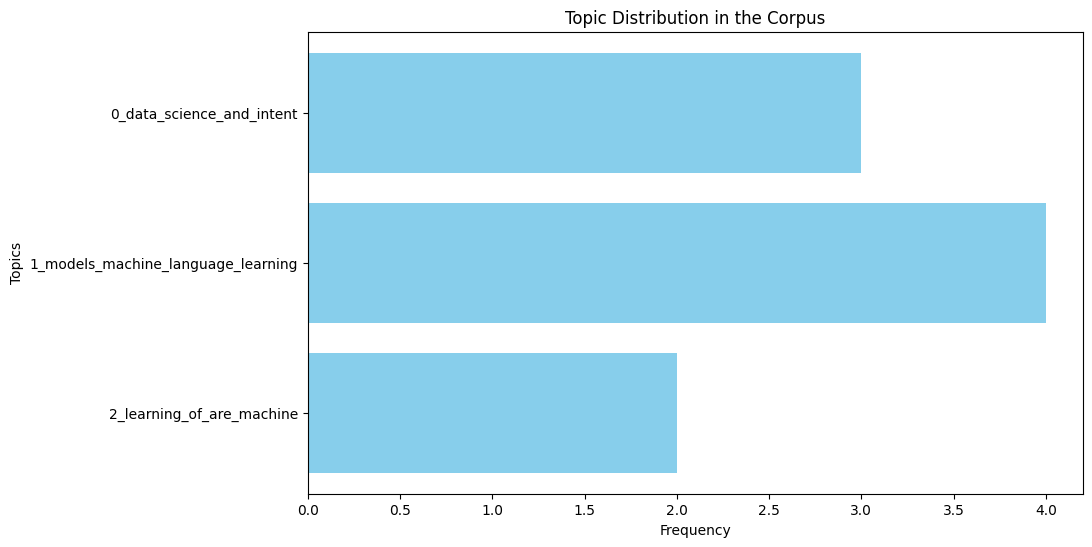

In [28]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.
import matplotlib.pyplot as plt

topic_counts = bertopic_model.get_topic_info()['Count']
topics = bertopic_model.get_topic_info()['Name']

plt.figure(figsize=(10, 6))
plt.barh(topics[:10], topic_counts[:10], color="skyblue")  # Plot top 10 topics by frequency
plt.xlabel("Frequency")
plt.ylabel("Topics")
plt.title("Topic Distribution in the Corpus")
plt.gca().invert_yaxis()
plt.show()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [26]:
!pip install gensim bertopic sentence-transformers numpy scikit-learn

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import spacy

data = [
    "Machine learning models are transforming industries.",
    "Artificial intelligence and deep learning are parts of machine learning.",
    "Natural language processing enables computers to understand human language.",
    "Data science includes data analysis and machine learning techniques.",
    "Supervised and unsupervised learning are types of machine learning.",
    "The healthcare industry benefits from predictive models and machine learning.",
    "Customer service can be enhanced through AI and machine learning applications.",
    "Natural language processing is key to understanding user sentiment and intent.",
    "Data science and analytics can provide business insights."
]

nlp = spacy.load("en_core_web_sm")
processed_data = [[token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct] for doc in data]
flat_data = [" ".join(doc) for doc in processed_data]  # For LSA and BERTopic
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

results = {}

lda_model = LdaModel(corpus=corpus, num_topics=3, id2word=dictionary, random_state=42, passes=10)
lda_topics = [[word for word, _ in lda_model.show_topic(topic_id, topn=10)] for topic_id in range(lda_model.num_topics)]
lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
results["LDA"] = {
    "coherence_score": lda_coherence_model.get_coherence(),
    "topics": lda_topics
}

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flat_data)
lsa_model = TruncatedSVD(n_components=3, random_state=42)
lsa_model.fit(tfidf_matrix)
lsa_topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]] for topic in lsa_model.components_]
lsa_coherence_model = CoherenceModel(topics=lsa_topics, texts=processed_data, dictionary=dictionary, coherence='c_v')
results["LSA"] = {
    "coherence_score": lsa_coherence_model.get_coherence(),
    "topics": lsa_topics
}

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(data, show_progress_bar=False)
kmeans_model = KMeans(n_clusters=3, random_state=42)
bertopic_model = BERTopic(nr_topics=3, hdbscan_model=kmeans_model, calculate_probabilities=True)
topics, _ = bertopic_model.fit_transform(data, embeddings)
bertopic_topics = [[word for word, _ in bertopic_model.get_topic(topic)[:10]] for topic in range(len(bertopic_model.get_topics()))]
bertopic_coherence_model = CoherenceModel(topics=bertopic_topics, texts=processed_data, dictionary=dictionary, coherence='c_v')
results["BERTopic"] = {
    "coherence_score": bertopic_coherence_model.get_coherence(),
    "topics": bertopic_topics
}

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Coherence Score: {result['coherence_score']}")
    for idx, topic in enumerate(result['topics']):
        print(f"Topic {idx + 1}: {', '.join(topic)}")
    print("\n")

Model: LDA
Coherence Score: 0.3861073677929256
Topic 1: understand, natural, processing, science, sentiment, key, intent, datum, user, analytic
Topic 2: language, machine, learning, industry, model, AI, enhance, service, customer, application
Topic 3: learning, machine, datum, science, include, data, technique, analysis, deep, intelligence


Model: LSA
Coherence Score: 0.5373251397436237
Topic 1: type, supervise, benefit, predictive, healthcare, transform, industry, model, machine, learning
Topic 2: enable, computer, user, key, intent, sentiment, processing, natural, understand, language
Topic 3: technique, data, include, analysis, analytic, provide, business, insight, datum, science


Model: BERTopic
Coherence Score: 0.43671054096973877
Topic 1: data, science, and, intent, is, understanding, user, techniques, sentiment, analysis
Topic 2: models, machine, language, learning, industries, healthcare, through, the, service, predictive
Topic 3: learning, of, are, machine, types, supervised

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Yeah overall experience is ok.

'''